In [1]:
import numpy as np

import keras

from keras.datasets import imdb

import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


# Data preparation

In [2]:
(X_train_raw, y_train), (X_test_raw, y_test) = imdb.load_data(
    num_words=10001,  # 10000 + 1 because of `index_from=0`,
                      # 0 is for `start_char`, `oov_char` and padding.
                      # Turns out that actual most frequent word gets number
                      # `index_from + 1`.
    start_char=0,
    oov_char=0,
    index_from=0
)  # as in the documentation, `num_words` most frequent words should be kept
   # with proper indices (actually `num_words-1`).

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/rgegotek/anaconda3/lib/python3.8/site-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/rgegotek/anaconda3/lib/python3.8/site-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this,

In [3]:
# example:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()])
print('Few most frequent words and their indices:', sorted(index.items(), key=lambda x:x[1])[:4])
print()
print(' '.join([reverse_index.get(i, "#") for i in X_train_raw[0][:30]]))

Few most frequent words and their indices: [('the', 1), ('and', 2), ('a', 3), ('of', 4)]

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing


In [4]:
def prepare_data(sequences):
    res = np.zeros(shape=(len(sequences), 10001), dtype=int)
    for i, sequence in enumerate(sequences):
        res[i, np.array(sequence)] = 1
    return res[:, 1:].copy()  # don't keep 0s - `start_char`,
                              # `oov_char` or padding

In [5]:
X_train = prepare_data(X_train_raw)
X_test = prepare_data(X_test_raw)

print(f'{X_train.shape = }')
print(f'{X_test.shape  = }')

X_train.shape = (25000, 10000)
X_test.shape  = (25000, 10000)


We will use test data for validation.

# Model

In [6]:
model1 = keras.Sequential()

layer1 = keras.layers.Dense(units=400, activation='relu')
layer2 = keras.layers.Dense(units=100, activation='relu')
output_layer = keras.layers.Dense(units=1, activation='sigmoid')

model1.add(layer1)
model1.add(layer2)
model1.add(output_layer)

In [7]:
model1.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [8]:
history1 = model1.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=0)

KeyboardInterrupt: 

In [9]:
def plot_acc_loss(history):
    his = history.history
    epoch = history.epoch
    
    plt.figure(figsize=(9, 6))
    
    ax1 = plt.axes()
    ax1.set_ylabel('Loss', fontsize=16)
    ax1.set_xlabel('Epoch', fontsize=16)
    plot_1 = ax1.plot(epoch, his['loss'], 'k-', label='Training loss')
    plot_2 = ax1.plot(epoch, his['val_loss'], 'b-', label='Validation loss')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Accuracy', fontsize=16)
    plot_3 = ax2.plot(epoch, his['accuracy'], 'r--', label='Training accuracy')
    plot_4 = ax2.plot(epoch, his['val_accuracy'], 'c--', label='Validation accuracy')
    
    lns = plot_1 + plot_2 + plot_3 + plot_4
    labels = [l.get_label() for l in lns]
    plt.legend(lns, labels, loc=3)

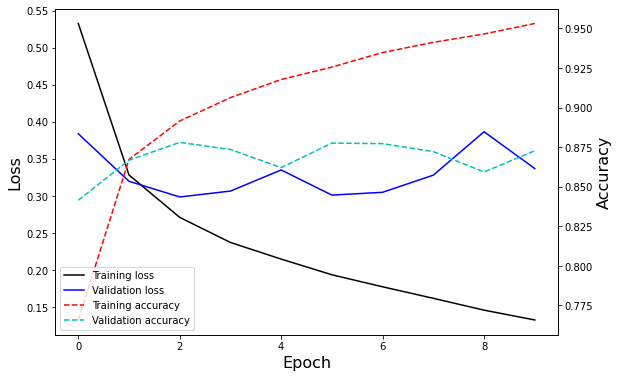

In [10]:
plot_acc_loss(history1)

In [11]:
def prepare_model(optimizer='sgd', regularizer=None):  # build model with architecture as the one above
    model = keras.Sequential()

    layer1 = keras.layers.Dense(units=400, activation='relu', kernel_regularizer=regularizer)
    layer2 = keras.layers.Dense(units=100, activation='relu', kernel_regularizer=regularizer)
    output_layer = keras.layers.Dense(units=1, activation='sigmoid')

    model.add(layer1)
    model.add(layer2)
    model.add(output_layer)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# L1 regularization

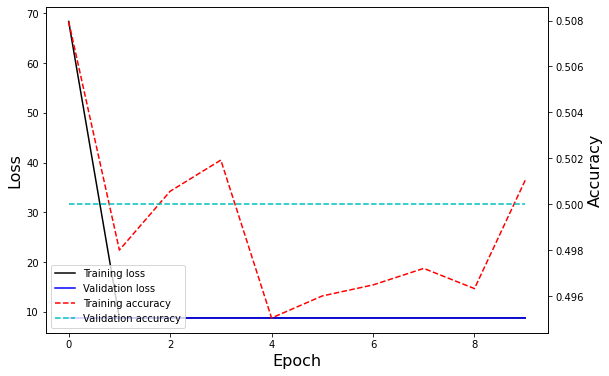

In [12]:
model2 = prepare_model(regularizer=keras.regularizers.L1(0.02))
history2 = model2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)
plot_acc_loss(history2)

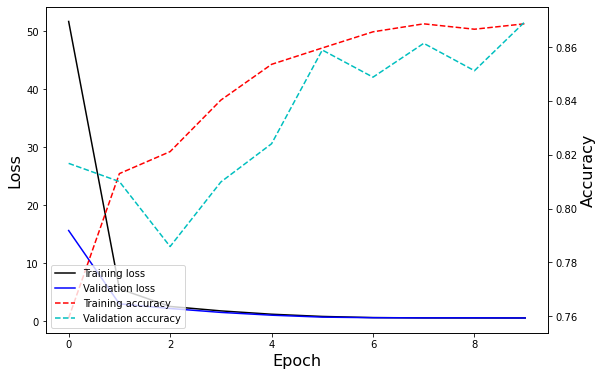

In [13]:
model3 = prepare_model(regularizer=keras.regularizers.L1(0.002))
history3 = model3.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)
plot_acc_loss(history3)

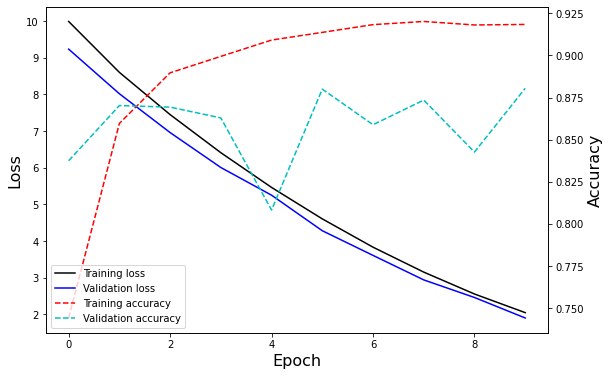

In [14]:
model4 = prepare_model(regularizer=keras.regularizers.L1(0.0002))
history4 = model4.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)
plot_acc_loss(history4)

# L2 regularization

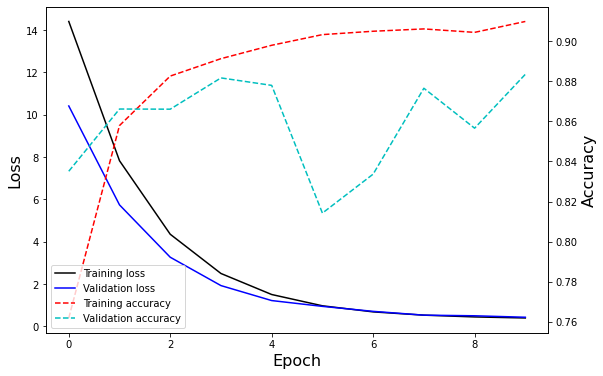

In [15]:
model5 = prepare_model(regularizer=keras.regularizers.L2(0.02))
history5 = model5.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)
plot_acc_loss(history5)

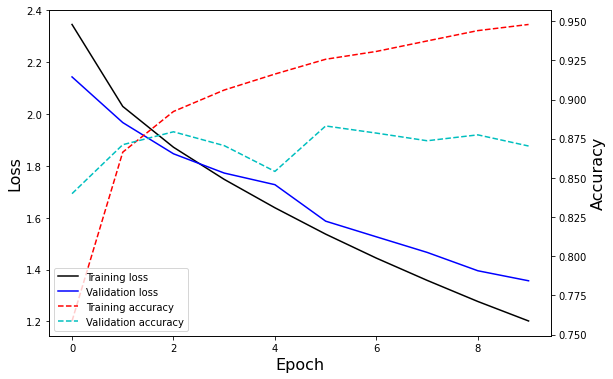

In [16]:
model6 = prepare_model(regularizer=keras.regularizers.L2(0.002))
history6 = model6.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)
plot_acc_loss(history6)

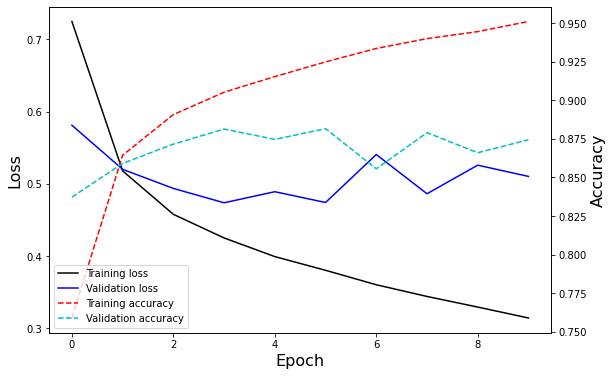

In [17]:
model7 = prepare_model(regularizer=keras.regularizers.L2(0.0002))
history7 = model7.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)
plot_acc_loss(history7)

# Different optimizers

Since L2 regularization with coefficient of 0.002 looks most promising, we'll use that regularizer for the rest of models.

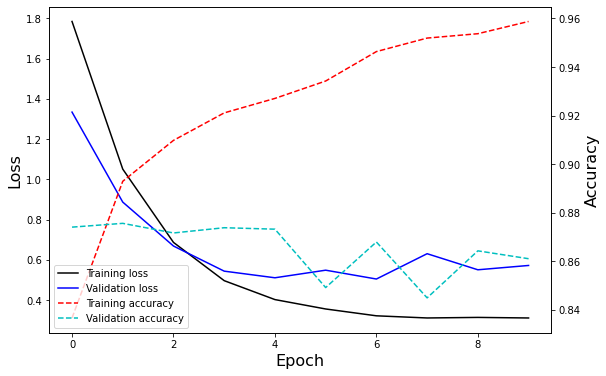

In [18]:
model8 = prepare_model(optimizer=keras.optimizers.sgd_experimental.SGD(momentum=0.9), regularizer=keras.regularizers.L2(0.002))
history8 = model8.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)
plot_acc_loss(history8)

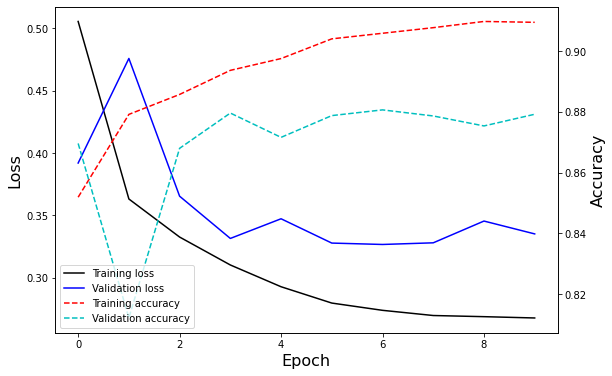

In [19]:
model9 = prepare_model(optimizer=keras.optimizers.rmsprop_v2.RMSprop(), regularizer=keras.regularizers.L2(0.002))
history9 = model9.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)
plot_acc_loss(history9)

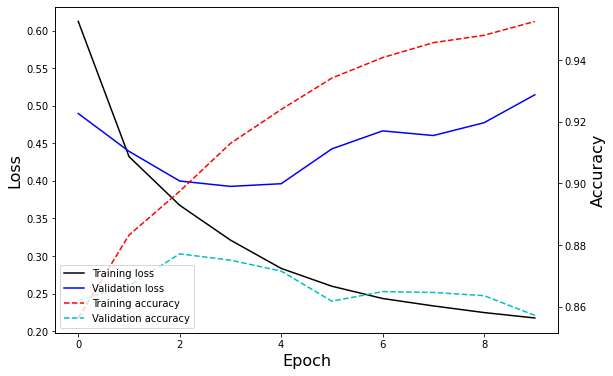

In [20]:
model10 = prepare_model(optimizer=keras.optimizers.nadam_v2.Nadam(), regularizer=keras.regularizers.L2(0.002))
history10 = model10.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)
plot_acc_loss(history10)

# Report

All models trained in this notebook comprises two hidden layers with 400 and 100 units respectively. For the regularization parameter $\lambda$ in L1 and L2 regularization three values was used: 0.02, 0.002, 0.0002. All those models were trained using SGD optimization without applying a momentum. Results varied a little, but most of them seemed to have reached similar values of validation accuracy and some of them plotted smooth loss curves meaning they could be trained for longer or using an optimizer which should converge faster. Best of them achieved validation accuracy slightly below 88%. The one that produced most promising learning curves combined with high accuracy was the one that used L2 regularization with $\lambda = 0.002$. 3 more models with the same regularizer was prepared and trained using 3 different optimizers, namely SGD with momentum coefficient of 0.9, RMSProp and Nadam, with other parameters set to default values. Nonetheless, none of them produced much better result, so the 88% validation accuracy is the best produced so far. To choose one model, the one trained with RMSProp was taken as the final best.

In [21]:
model9.evaluate(X_test, y_test)

782/782 [==============================] - 9s 11ms/step - loss: 0.3351 - accuracy: 0.8792


[0.3350774347782135, 0.8791999816894531]